In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Data
df = pd.read_csv('Influencer.xlsx - Influencer.csv')
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [3]:
df.shape

(200, 10)

In [4]:
# Removing Unwanted charaters in Channel info
df['Channel Info'] = df['Channel Info'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()       

In [5]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [6]:
df.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [7]:
# Converting Billions, Millions and k to integers

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'b' in x:
        return float(x.replace('b', '')) * 1000000000
    return 0.0

df['Followers'] = df['Followers'].apply(value_to_float)
df['Avg. Likes'] = df['Avg. Likes'].apply(value_to_float)
df['Posts'] = df['Posts'].apply(value_to_float)
df['New Post Avg. Likes'] = df['New Post Avg. Likes'].apply(value_to_float)
df['Total Likes'] = df['Total Likes'].apply(value_to_float)


In [8]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers              float64
Avg. Likes             float64
Posts                  float64
60-Day Eng Rate        float64
New Post Avg. Likes    float64
Total Likes            float64
Country Or Region       object
dtype: object

In [9]:
df = df.rename(columns = {'Channel Info':'Channel_Info','Influence Score':'Influence_Score','Avg. Likes':'Avg._Likes','60-Day Eng Rate':'60-Day_Eng_Rate','New Post Avg. Likes':'New_Post_Avg._Likes','Total Likes':'Total_Likes'})  #Tried to rename columns

In [10]:
# For Finding the Correlation Features

df.corr()             

,Rank,Influence_Score,Followers,Avg._Likes,Posts,60-Day_Eng_Rate,New_Post_Avg._Likes,Total_Likes
Rank,1.000000,-0.354843,-0.698193,-0.277699,-0.059442,0.028900,-0.272323,-0.465119
Influence_Score,-0.354843,1.000000,0.365428,0.048502,0.170570,-0.072460,0.040011,0.234987
Followers,-0.698193,0.365428,1.000000,0.346829,0.068053,-0.107439,0.260764,0.667546
Avg._Likes,-0.277699,0.048502,0.346829,1.000000,-0.350119,0.789359,0.892784,0.361296
Posts,-0.059442,0.170570,0.068053,-0.350119,1.000000,-0.334506,-0.288496,0.237632
60-Day_Eng_Rate,0.028900,-0.072460,-0.107439,0.789359,-0.334506,1.000000,0.866293,-0.001560
New_Post_Avg._Likes,-0.272323,0.040011,0.260764,0.892784,-0.288496,0.866293,1.000000,0.351335
Total_Likes,-0.465119,0.234987,0.667546,0.361296,0.237632,-0.001560,0.351335,1.000000


**Question 1** : Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

**Answer**:  Ya There are Correlated features in the given dataset. The Highly Correlated Features are :  

1.   Average Likes and New Post Average Likes whichi is 0.89
2.   60_Day Engagement Rate and New Post Average Likes which is 0.86
3.   Average Likes and 60_Day Engagement Rate which is 0.78

These are the Top 3 Highly Correlated features.

(array([  1.,   0.,   3.,   1.,   1.,   2.,   3.,  25., 107.,  57.]),
 array([22. , 29.1, 36.2, 43.3, 50.4, 57.5, 64.6, 71.7, 78.8, 85.9, 93. ]),
 <a list of 10 Patch objects>)

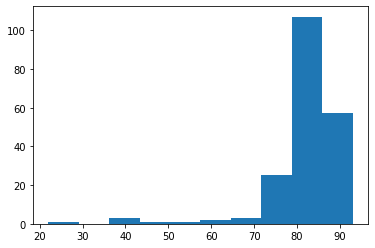

In [11]:
# For Finding the Fequency Distribution of Features

#Influence Score
plt.hist(df['Influence_Score'])

(array([161.,  10.,   8.,   5.,   6.,   3.,   4.,   2.,   0.,   1.]),
 array([3.3400e+07, 7.8580e+07, 1.2376e+08, 1.6894e+08, 2.1412e+08,
        2.5930e+08, 3.0448e+08, 3.4966e+08, 3.9484e+08, 4.4002e+08,
        4.8520e+08]),
 <a list of 10 Patch objects>)

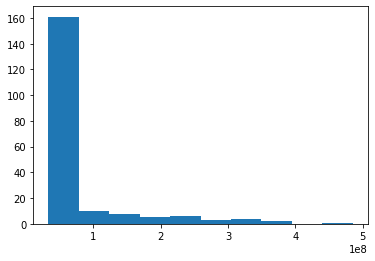

In [12]:
#Followers
plt.hist(df['Followers'])

(array([80., 48., 22., 13., 11., 22.,  2.,  1.,  0.,  1.]),
 array([    0.,  1690.,  3380.,  5070.,  6760.,  8450., 10140., 11830.,
        13520., 15210., 16900.]),
 <a list of 10 Patch objects>)

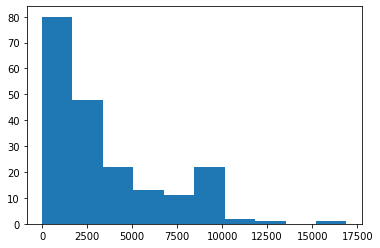

In [13]:
#Posts
plt.hist(df['Posts'])

Text(0.5, 1.0, 'Country with Highest Instagram Influencers')

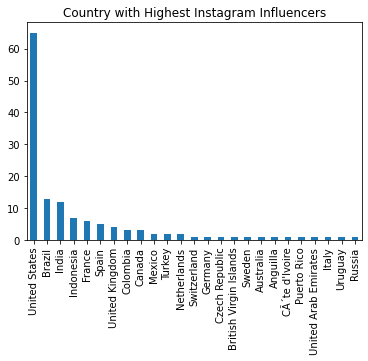

In [14]:
# Finding the Country which has highest number of Instagram Influencers 

df['Country Or Region'].unique()

a = df['Country Or Region'].value_counts()
a.plot.bar()
plt.title('Country with Highest Instagram Influencers')

The Above one shows that United States has the highest number of Instagram Influencers in their country followed by Brazil and India.

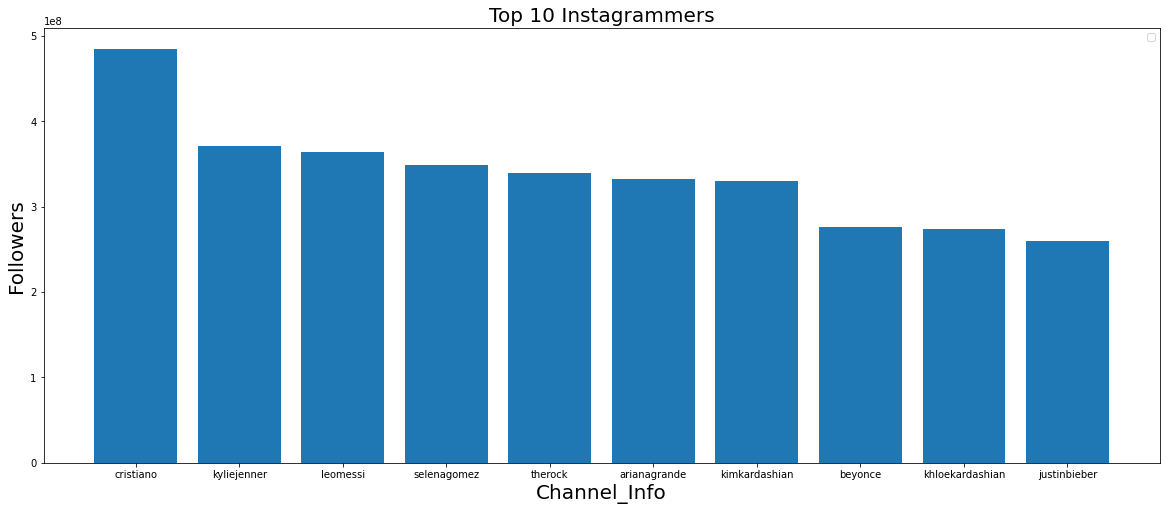

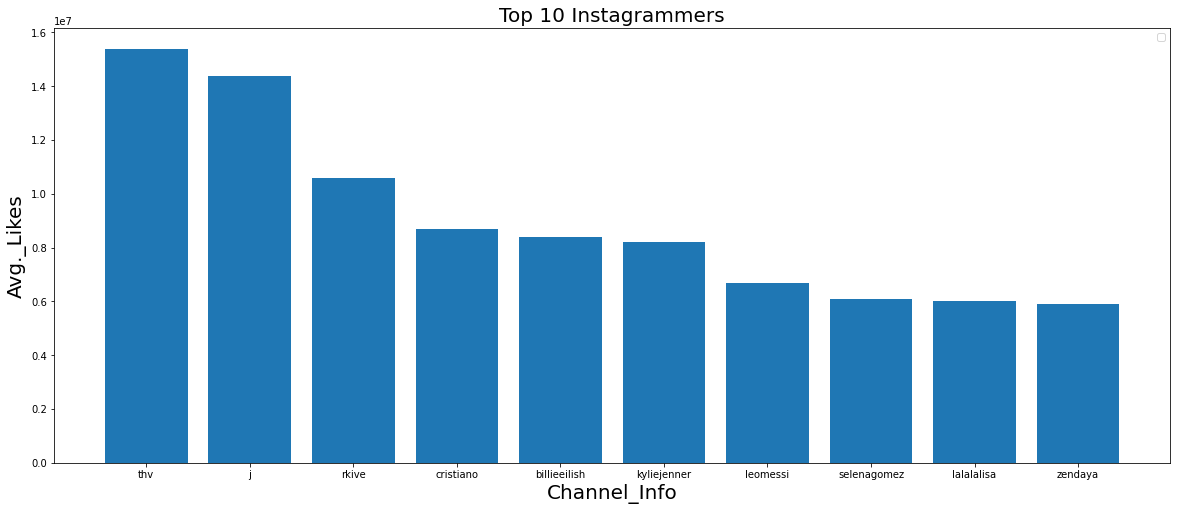

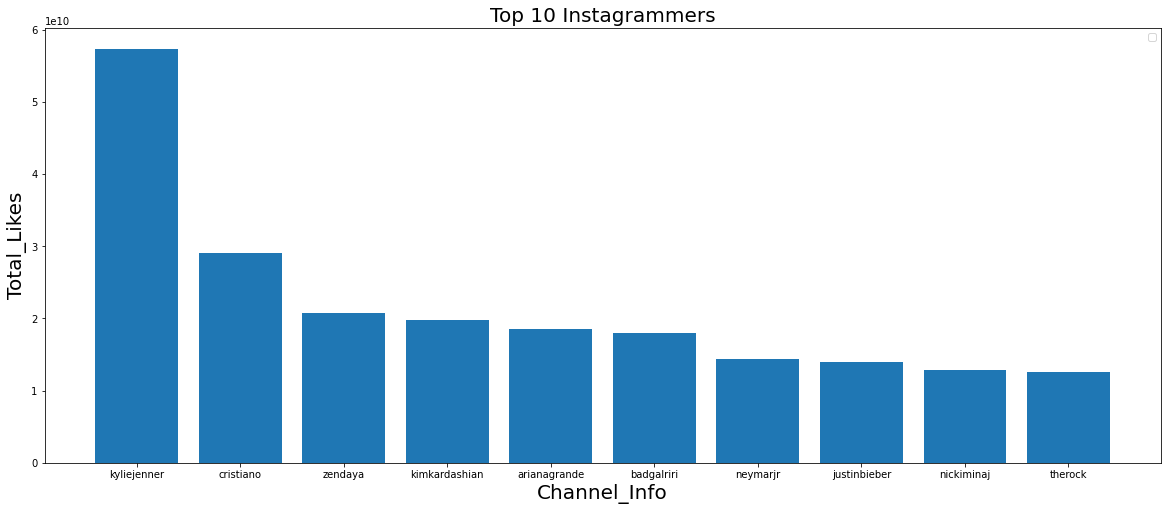

In [15]:
# For Finding Top 10 Instagram Influencers based on
    #Followers
    #Avg.Likes
    #Total Likes
  
features = ['Followers','Avg._Likes','Total_Likes']
for column in features:
    top10 = df.nlargest(10,column)
    plt.figure(figsize=(20,8))
    plt.bar(top10['Channel_Info'], top10[column])
    plt.ylabel(column, fontsize = 20)
    plt.xlabel("Channel_Info", fontsize = 20)
    plt.title("Top 10 Instagrammers", fontsize = 20)
    plt.legend()

The Above one gives us the Name of the Top 10 Instagram Influencers based on Followers , Average Likes and Total Likes

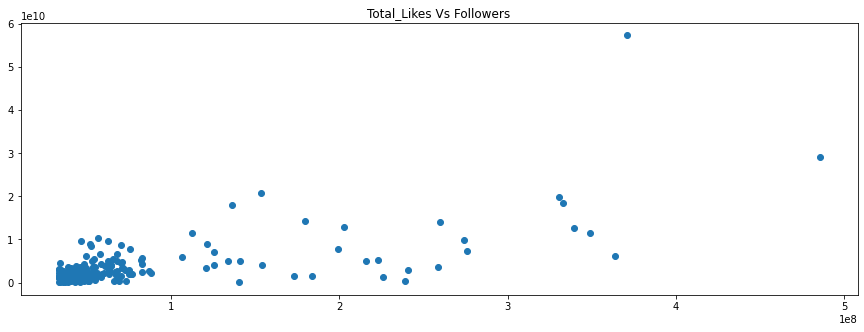

In [16]:
#Finding the Relationship between the pair of features


plt.figure(figsize=(15, 5))
plt.title("Total_Likes Vs Followers")
plt.scatter(data=df, x="Followers", y="Total_Likes")
plt.show()

The Above Scatter Plot shows us Followers and Total Likes have strong Linear Relationship even Outliers are Present

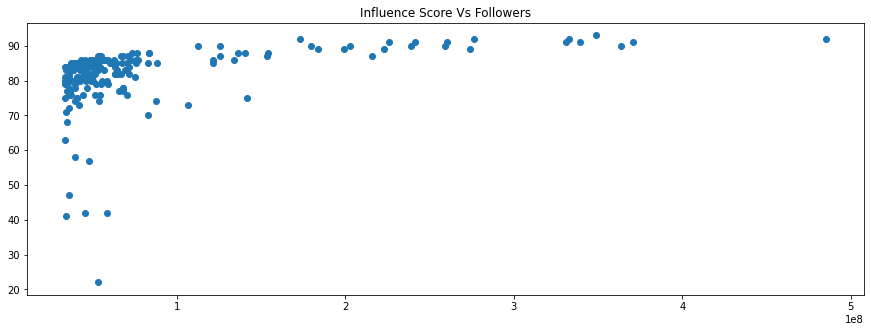

In [17]:
plt.figure(figsize=(15, 5))
plt.title("Influence Score Vs Followers")
plt.scatter(data=df, x="Followers", y="Influence_Score")
plt.show()

The Above Scatter plot shows the Relationship between Influence Score and Followers.

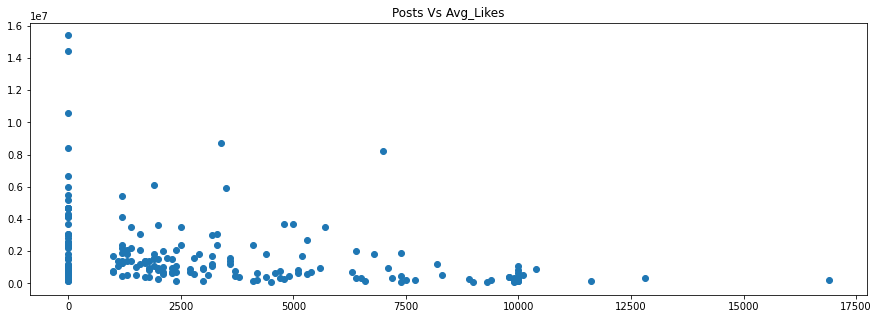

In [18]:
plt.figure(figsize=(15, 5))
plt.title("Posts Vs Avg_Likes")
plt.scatter(data=df, x="Posts", y="Avg._Likes")
plt.show()

The Above Scatter plot shows the Linear Relationship between Posts and Average Likes.

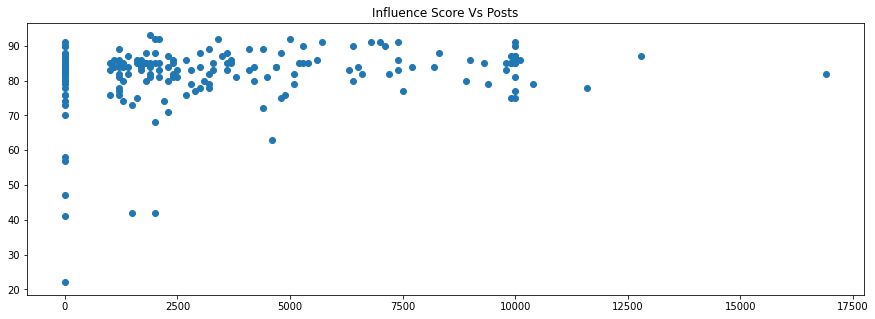

In [19]:
plt.figure(figsize=(15, 5))
plt.title("Influence Score Vs Posts")
plt.scatter(data=df, x="Posts", y="Influence_Score")
plt.show()

The Above Scatter plot shows the Relationship between Influence Score and Posts